# Introduction to Bioinformatics

## 02 - Pairwise alignment

In the first practice session, we learned how to access a file's content and how to do some basic operations with python strings. We worked with a fasta-format file that contained only one sequence. We pick up from this last point and extend our method to read multiple sequences from a fasta file. Later, we explore how a specialized library called [Biopython](https://biopython.org/) deals with sequence information. Using this library, we then compare many sequences utilizing the percentage of identity as a metric.

### Multiple sequence data

Most of the time, we will want to compare multiple sequences to know how they relate to each other. When these sequences are evolutionarily related, they are known as homologous sequences. Now that we are familiar with single sequence fasta files let's try to read a multiple sequence fasta file into a dictionary.

To obtain the data, we will [BLAST](https://en.wikipedia.org/wiki/BLAST_(biotechnology)) our sequence and download the resulting fasta file. We will run the BLAST algorithm using the P0CG48 code inside the Uniprot page:

[Uniprot BLAST page](https://www.uniprot.org/blast/)

How many sequences do we have?

In [1]:
count = 0
with open('input/P0CG48_BLAST_sequences.fasta') as ff:
    for l in ff:        
        # Gather sequence lines only
        if l.startswith('>'):
#             count = count + 1
            count += 1
print(count)

49


Now we put the fasta file into a dictionary:

In [2]:
# Define empty dictionary to store sequences in it
sequences = {}

# Define the single-sequence container as an empty string
sequence = ''
# Open the multiple sequences fasta file
with open('input/P0CG48_BLAST_sequences.fasta') as ff:
    for l in ff:        
        # Gather sequence lines only
        if not l.startswith('>'):
            # Merge these lines into a single string
            sequence += l.strip()
        # Match fasta name lines (starting with >)
        else:
            # Not at the first iteration because sequence must different than ''
            if sequence != '':
                # Save entry in the dictionary
                sequences[uniprot_id] = sequence
            uniprot_id = l.split('|')[1]
            # Empty the sequence string 
            sequence = ''
            
# Print the dictionary length (the number of elements in it).
print(len(sequences.keys()))

48


We notice that we are short on one sequence. Why is that?

After the final iteration, there is still a missing entry in the dictionary, and this is because the final iteration does not store the last iterated sequence. We only save the sequence we were gathering when we find a ">" symbol at the beginning of the line. However, our last sequence is not followed by this symbol. This pitfall is easily managed if we tell python to store the end sequence once it has done its last iteration, i.e., after the "for loop" has finished.

In [3]:
sequences = {}

sequence = ''
with open('input/P0CG48_BLAST_sequences.fasta') as ff:
    for l in ff:        
        if not l.startswith('>'):
            sequence += l.strip()
        else:
            if sequence != '':
                sequences[uniprot_id] = sequence
            uniprot_id = l.split('|')[1]
            sequence = ''
            
    # Notice where this identation is located. It will save the last sequence after
    # the "for loop" has finished; this is, outside the for loop.
    sequences[uniprot_id] = sequence

# Print the dictionary entries
print(len(sequences.keys()))

49


In [4]:
# Let's print our dictionary to see how it looks like.
print(sequences)

{'P0CG61': 'MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGV', 'P0CG64': 'MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGGMQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNI

### Declaring python functions

Note that the previous code is sufficiently generic to be applied to any fasta file. You can reuse the code as many times as you want if you wrap it as a Python function. If the functions you write are generalizable, they can be applied in many different contexts, saving us a lot of typing!

We will convert the above code into a function. This function will get as input the path to the fasta file, and it will return a dictionary containing the sequences. Also, the function must have proper documentation. The documentation should include the definition and usage of the function. In this way, the function can be understood and used by others.

To declare a function, we begin with the word "def," followed by the function's name, inputs, and keywords. The function ends when it encounters a return statement. This statement allows you to store the function's output into a variable after its execution.

```
def myfunction(arguments, keywords=None):
    """
    Here goes the documentation
    """
    
    Here goes the code
    
    Here goes the return statement
    
```  
     
Let's declare a function to read fasta files as dictionaries:

In [5]:
def readFasta(input_fasta):
    """
    Reads a fasta file and returns the sequence data as a dictionary.
    
    Parameters
    ----------
    input_fasta : str
        Path to the input fasta file
    
    Returns
    -------
    sequences : dict
        Dictionary containing the IDs and squences in the fasta file.
    """
    sequences = {}
    sequence = ''
    with open(input_fasta) as ff:
        for l in ff:        
            if not l.startswith('>'):
                sequence += l.strip()
            else:
                if sequence != '':
                    sequences[uniprot_id] = sequence
                uniprot_id = l.split('|')[1]
                sequence = ''
        sequences[uniprot_id] = sequence
    
    return sequences

In [6]:
sequences = readFasta('input/P0CG48_BLAST_sequences.fasta')
print(sequences.keys())

dict_keys(['P0CG61', 'P0CG64', 'P0CG48', 'P0CG69', 'Q63429', 'P0CG50', 'P0CH28', 'P0CG71', 'P62976', 'P0CG66', 'P0CG68', 'P0CG78', 'P59669', 'P42740', 'Q8H159', 'P0CH05', 'P0CH04', 'P0CG85', 'Q39256', 'P42739', 'P0CG82', 'P0CG75', 'P0CG79', 'P0CG72', 'P0CH32', 'P69322', 'P0CG63', 'Q58G87', 'P0CG81', 'P0CG76', 'P0CG84', 'P0CG54', 'P0CG51', 'P0CG49', 'P0CG62', 'P0CG53', 'P0CG55', 'Q8MKD1', 'P69315', 'Q1EC66', 'Q3E7T8', 'P69325', 'P69309', 'P0CG88', 'P0CG80', 'P0CG74', 'P0CH27', 'P0CG70', 'Q9FHQ6'])


This syntax is a compelling way of programming. You can reuse any code previously made and put it to fair use in different contexts by making functions.

To get help for a function, you just call:

In [7]:
help(readFasta)

Help on function readFasta in module __main__:

readFasta(input_fasta)
    Reads a fasta file and returns the sequence data as a dictionary.
    
    Parameters
    ----------
    input_fasta : str
        Path to the input fasta file
    
    Returns
    -------
    sequences : dict
        Dictionary containing the IDs and squences in the fasta file.



This prints out the documentation of the function. Acceptable documentation should give you all you need to understand how the function is used. To get specific details of a function, you need to look at its code and comments within.

### Read sequences with Biopython 

Now that you are aware of how files can be read and parsed by python. We will move forward and use a specialized library to read, store and analyze our data. It uses more sophisticated functions to read and parse fasta files and other file formats relevant for storing biological data.

Let's read our blast fasta file with Biopython. We start by importing Biopython and all other libraries we will need.

In [8]:
from Bio import SeqIO

Biopython has a SeqIO interface that allows us to read fasta formatted files. We use the method parse to read the data into a generator, a particular type of iterator.

In [9]:
# Read fasta file with Biopython's SeqIO interface
sequences = SeqIO.parse('input/P0CG48_BLAST_sequences.fasta', 'fasta')

#We print the sequences contained in the iterator with a for loop
for sequence in sequences:
    print(sequence)
    print() # Empty print to separate each iteration's print

ID: sp|P0CG61|UBC_PONPY
Name: sp|P0CG61|UBC_PONPY
Description: sp|P0CG61|UBC_PONPY Polyubiquitin-C OS=Pongo pygmaeus OX=9600 GN=UBC PE=3 SV=1
Number of features: 0
Seq('MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGR...GGV', SingleLetterAlphabet())

ID: sp|P0CG64|UBC_PANTR
Name: sp|P0CG64|UBC_PANTR
Description: sp|P0CG64|UBC_PANTR Polyubiquitin-C OS=Pan troglodytes OX=9598 GN=UBC PE=1 SV=1
Number of features: 0
Seq('MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGR...GGV', SingleLetterAlphabet())

ID: sp|P0CG48|UBC_HUMAN
Name: sp|P0CG48|UBC_HUMAN
Description: sp|P0CG48|UBC_HUMAN Polyubiquitin-C OS=Homo sapiens OX=9606 GN=UBC PE=1 SV=3
Number of features: 0
Seq('MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGR...GGV', SingleLetterAlphabet())

ID: sp|P0CG69|UBIQP_DROME
Name: sp|P0CG69|UBIQP_DROME
Description: sp|P0CG69|UBIQP_DROME Polyubiquitin OS=Drosophila melanogaster OX=7227 GN=Ubi-p63E PE=3 SV=1
Number of features: 0
Seq('MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRL

Now we use the help() method to understand how Biopython represents sequences.

In [10]:
# Let us call help in the sequence object
help(sequence)

Help on SeqRecord in module Bio.SeqRecord object:

class SeqRecord(builtins.object)
 |  A SeqRecord object holds a sequence and information about it.
 |  
 |  Main attributes:
 |   - id          - Identifier such as a locus tag (string)
 |   - seq         - The sequence itself (Seq object or similar)
 |  
 |  Additional attributes:
 |   - name        - Sequence name, e.g. gene name (string)
 |   - description - Additional text (string)
 |   - dbxrefs     - List of database cross references (list of strings)
 |   - features    - Any (sub)features defined (list of SeqFeature objects)
 |   - annotations - Further information about the whole sequence (dictionary).
 |     Most entries are strings, or lists of strings.
 |   - letter_annotations - Per letter/symbol annotation (restricted
 |     dictionary). This holds Python sequences (lists, strings
 |     or tuples) whose length matches that of the sequence.
 |     A typical use would be to hold a list of integers
 |     representing sequen

Two main attributes represent the id and the sequences.  Additionally, other attributes can contain additional information about our sequence. Let's print some attributes to see what they have.

In [11]:
# Sequence information
print(sequence.id)
print(sequence.name)
print(sequence.description)
print(sequence.annotations)
print('----------')

sp|Q9FHQ6|UBQ9_ARATH
sp|Q9FHQ6|UBQ9_ARATH
sp|Q9FHQ6|UBQ9_ARATH Polyubiquitin 9 OS=Arabidopsis thaliana OX=3702 GN=UBQ9 PE=3 SV=1
{}
----------


How do we access the sequence?

In [12]:
# Sequence itself
print(sequence.seq)
print()
print(sequence[10:20]) # Slice directly on the SeqRecord object
print()
print(sequence.seq[10:20]) # Slice on the Seq object
print('----------')
# Print types
print(type(sequence))
print(type(sequence[10:20]))
print('----------')
print(type(sequence.seq))
print(type(sequence.seq[10:20])) 
print('----------')

MSMQIHAKTLTEKTITIDVVSSDTINNVKAKIQDIEGIPLDQQRLIFSGKLLDDGRTLADYSIQKDSILHLALRLRGGMQIFVKTLTGKTITLEVESSDTIDNVKAKIQDKEGVPPDQQRLIFAGKQLDDGRTLADYNIQKESTLHLVLRLRGGMQIFVRTLTRKTIALEVESSDTTDNVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLADYNIQKESTLHLVLRLCGGMQIFVNTLTGKTITLEVESSDTIDNVKAKIQDKERIQPDQQRLIFAGEQLEDGYYTLADYNIQKESTLHLVLRLRGGECFGFIFLFLLCFNS

ID: sp|Q9FHQ6|UBQ9_ARATH
Name: sp|Q9FHQ6|UBQ9_ARATH
Description: sp|Q9FHQ6|UBQ9_ARATH Polyubiquitin 9 OS=Arabidopsis thaliana OX=3702 GN=UBQ9 PE=3 SV=1
Number of features: 0
Seq('TEKTITIDVV', SingleLetterAlphabet())

TEKTITIDVV
----------
<class 'Bio.SeqRecord.SeqRecord'>
<class 'Bio.SeqRecord.SeqRecord'>
----------
<class 'Bio.Seq.Seq'>
<class 'Bio.Seq.Seq'>
----------


We can call help on the Seq type object to know more about it.

In [13]:
help(sequence.seq)

Help on Seq in module Bio.Seq object:

class Seq(builtins.object)
 |  Read-only sequence object (essentially a string with an alphabet).
 |  
 |  Like normal python strings, our basic sequence object is immutable.
 |  This prevents you from doing my_seq[5] = "A" for example, but does allow
 |  Seq objects to be used as dictionary keys.
 |  
 |  The Seq object provides a number of string like methods (such as count,
 |  find, split and strip), which are alphabet aware where appropriate.
 |  
 |  In addition to the string like sequence, the Seq object has an alphabet
 |  property. This is an instance of an Alphabet class from Bio.Alphabet,
 |  for example generic DNA, or IUPAC DNA. This describes the type of molecule
 |  (e.g. RNA, DNA, protein) and may also indicate the expected symbols
 |  (letters).
 |  
 |  The Seq object also provides some biological methods, such as complement,
 |  reverse_complement, transcribe, back_transcribe and translate (which are
 |  not applicable to sequen

To learn more about how Biopython handles sequence files, please visit:

[Biopython SeqIO](https://biopython.org/wiki/SeqIO)

### Align sequences with biopython

Biopython contains methods to align a pair of sequences, either globally or locally.
Let's pick up two sequences and align them:

In [14]:
from Bio.Seq import Seq

In [15]:
# These are two random DNA sequences of 20bp length
seq1 = Seq('GGGCGGCCTGGCCGGAGCAC')
seq2 = Seq('TCCTCGGCGATGTGTGTAAA')

print(type(seq1))
print(type(seq2))

<class 'Bio.Seq.Seq'>
<class 'Bio.Seq.Seq'>


We will employ the Bio.pairwise2 module to align the two sequences globally:

In [16]:
from Bio import pairwise2

In [17]:
# align and print the number of different alignments
alignments = pairwise2.align.globalxx(seq1, seq2)
print(len(alignments))

201


The method generates many alignments that have similar scores. We can access all of them by iterating the alignment object. We do so and print the resulting five first alignments

In [18]:
# Print first 5 alignments
for a in alignments[:5]:
    print(a)

('GGGCGG-CCT-GGCCGGA-GC-----AC--', '------TCCTCGG-C-GATG-TGTGTA-AA', 10.0, 0, 30)
('GGGCGGCCT-GGCCGGA-GC-----AC--', '-----TCCTCGG-C-GATG-TGTGTA-AA', 10.0, 0, 29)
('GGGCGGCCT-GGCCGGA-GC-----AC--', '----T-CCTCGG-C-GATG-TGTGTA-AA', 10.0, 0, 29)
('GGGCGGCCT-GGCCGGA-GC-----AC--', '---T--CCTCGG-C-GATG-TGTGTA-AA', 10.0, 0, 29)
('GGGCGGCCT-GGCCGGA-GC-----AC--', '--T---CCTCGG-C-GATG-TGTGTA-AA', 10.0, 0, 29)


We can improve the visualization by using the "format_alignment" function of the Biopython pairwise2 method.

In [19]:
from Bio.pairwise2 import format_alignment

In [20]:
print('Pretty print first alignment:')
print(format_alignment(*alignments[0]))
print('Print alignment sequences:')
# We access each sequence with indexes
print(alignments[0][0]) # first sequence with index 0
print(alignments[0][1]) # second sequence with index 1

Pretty print first alignment:
GGGCGG-CCT-GGCCGGA-GC-----AC--
       ||| || | || |      |   
------TCCTCGG-C-GATG-TGTGTA-AA
  Score=10

Print alignment sequences:
GGGCGG-CCT-GGCCGGA-GC-----AC--
------TCCTCGG-C-GATG-TGTGTA-AA


We see that for each alignment generated, we can access the individual strings of each sequence by just using indexing over the alignment object.

Now using this, let's calculate the percentage of identity for each alignment. For this, we create a function:

In [21]:
def calculatePID(alignment):
    
    # Get the two sequences
    seq1 = alignment[0]
    seq2 = alignment[1]
    
    count = 0 # Variable containing the count of matching characters
    # iterate
    for j in range(len(seq1)):
        p1 = seq1[j] # Position i of first alignment 
        p2 = seq2[j] # Position i of second alignment
    
        # Only count when we don't have '-' at any position.
        if p1 != '-' and p2 != '-':
            # Only when the sequences match
            if p1 == p1:
                count += 1
            
    # Get length of each sequence
    l1 = len([p for p in seq1 if p != '-'])
    l2 = len([p for p in seq2 if p != '-'])
    
    # the PID uses the length of the shortest sequence to convert to percentage
    pid = count/min(l1, l2)
    return pid

Using this function, let's calculate the percentage of identity (PID) of an alignment:

In [22]:
print('Alignment 0 PID:')
print(calculatePID(alignments[0]))

Alignment 0 PID:
0.5


### Calculate a PID matrix

We now move into comparing sequences in an all vs. all fashion. This type of comparison is advantageous if we want to find groups of related sequences. To this end, We need to compare every sequence to each other. We will need a matrix to store the comparison data (NumPy offers a convenient way of storaging matrix data). Let's have a look at how a matrix of data looks like:

In [23]:
import numpy as np

In [24]:
# print a 5x5 matrix filled with zeros
M = np.zeros((5,5))

Each (i,j) element of the matrix contains a value that corresponds to the comparison of elements i and j. 

We now read a set of N sequences and store them in a dictionary:

In [25]:
# Read the sequences in the file
sequences = SeqIO.parse('input/apolipoproteinCI_sequences.fasta', 'fasta')
# Convert iterator to dictionary
sequences = {s.id : s for s in sequences}

We will calculate the percentage of identity between each pair of sequences
and store the M matrix values. First, we initialize a matrix with the correct shape and filled with zeros to keep all the values (NxN).

In [26]:
# Initialize the NxN matrix  matrix
N = len(sequences)
M = np.zeros((N, N))
print(M.shape)

(48, 48)


Finally, we compare all the sequences to each other. To iterate the elements to compare, we use a double for loop; one loop for i and one for j elements:

In [27]:
for i,s1 in enumerate(sequences):
    for j, s2 in enumerate(sequences):
        seq1 = sequences[s1]
        seq2 = sequences[s2]
        if i == j: # the same element always has a PID=1.0
            M[i][j] = 1.0
        if j > i : # We compare only half matrix
            alignment = pairwise2.align.globalxx(sequences[s1], sequences[s2])
            M[i][j] = calculatePID(alignment[0])
#             M[j][i] = M[i][j] # Uncomment this to fill the lower half matrix

Let's visualize how our matrix looks like using matplotlib

In [28]:
import matplotlib.pyplot as plt

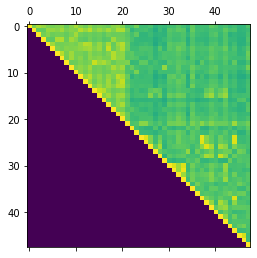

In [29]:
plt.matshow(M)

### Wrapping up

In this second practice session, we learned:

- How to read multiple sequences from a file and store them as a dictionary
- How to write a Python function for repetitive tasks
- How to read sequences with Biopython 
- How to do a pairwise alignment of two sequences with Biopython
- How to calculate a PID matrix